In [2]:
import pandas as pd 

In [3]:
archivo_combinado = '../CSV/df_web_data_combinado.csv'
archivo_experimental = '../CSV/df_final_experiment_clients.csv'
archivo_demo = '../CSV/df_final_demo.csv'

df_final_web_data_combinado = pd.read_csv(archivo_combinado)
df_experiment_clients = pd.read_csv(archivo_experimental)
df_demo = pd.read_csv(archivo_demo)

df_final_web_data_combinado.head(), df_experiment_clients.head(), df_demo.head() 

(   client_id            visitor_id                      visit_id process_step  \
 0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
 1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
 2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
 3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
 4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
 
              date_time  
 0  2017-04-17 15:27:07  
 1  2017-04-17 15:26:51  
 2  2017-04-17 15:19:22  
 3  2017-04-17 15:19:13  
 4  2017-04-17 15:18:04  ,
    client_id Variation
 0    9988021      Test
 1    8320017      Test
 2    4033851   Control
 3    1982004      Test
 4    9294070   Control,
    client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
 0     836976             6.0              73.0      60.5     U        2.0   
 1    2304905             7.0              94.0 

#Valores cercanos a 1 indican una correlación positiva fuerte.
#Valores cercanos a -1 indican una correlación negativa fuerte.
#Valores cercanos a 0 indican que no hay correlación.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Realizar la combinación de los DataFrames utilizando 'client_id'
df_demo_expanded = df_demo.merge(
    df_experiment_clients[['client_id', 'Variation']],  # Seleccionamos solo 'client_id' y 'Variation'
    on='client_id',  # La clave para la combinación
    how='left'  # Hacemos un 'left join' para conservar todos los registros de df_demo
)

# Verifica la combinación
print(df_demo_expanded.head())

   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U        2.0   
3    1562045            16.0             198.0      49.0     M        2.0   
4    5126305            12.0             145.0      33.0     F        2.0   

         bal  calls_6_mnth  logons_6_mnth Variation  
0   45105.30           6.0            9.0      Test  
1  110860.30           6.0            9.0   Control  
2   52467.79           6.0            9.0      Test  
3   67454.65           3.0            6.0      Test  
4  103671.75           0.0            3.0   Control  


In [17]:
df_demo_expanded.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [67]:
df_demo_expanded['Variation'].value_counts()

Variation
test       26961
control    23527
Name: count, dtype: int64

In [69]:
df_demo_expanded.to_csv('df_demo_expanded.csv', index=False)

In [18]:
# Limpiar el dataframe eliminando filas con valores nulos en las columnas relevantes
df_demo_expanded = df_demo_expanded.dropna(subset=['clnt_tenure_yr', 'clnt_tenure_mnth', 'num_accts', 'bal'])

# Asegurémonos de que los valores de Variation sean consistentes (sin espacios ni mayúsculas)
df_demo_expanded['Variation'] = df_demo_expanded['Variation'].str.strip().str.lower()

# Crear la columna 'total_tenure_months' que será la suma de años y meses convertidos a meses
df_demo_expanded['total_tenure_months'] = df_demo_expanded['clnt_tenure_yr'] * 12 + df_demo_expanded['clnt_tenure_mnth']

# Separar los datos por grupo de prueba y control
control_data = df_demo_expanded[df_demo_expanded['Variation'] == 'control']
test_data = df_demo_expanded[df_demo_expanded['Variation'] == 'test']

# Verificar cuántos registros tiene cada grupo
print(f'Número de registros en el grupo de control: {len(control_data)}')
print(f'Número de registros en el grupo de test: {len(test_data)}')

# Calcular la correlación para el grupo de control
control_corr = control_data[['num_accts', 'bal', 'total_tenure_months']].corr()

# Calcular la correlación para el grupo de test
test_corr = test_data[['num_accts', 'bal', 'total_tenure_months']].corr()

# Mostrar los resultados
print("Correlaciones en el grupo de control:")
print(control_corr)

print("\nCorrelaciones en el grupo de test:")
print(test_corr)


Número de registros en el grupo de control: 23527
Número de registros en el grupo de test: 26961
Correlaciones en el grupo de control:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.276809             0.148631
bal                   0.276809  1.000000             0.213581
total_tenure_months   0.148631  0.213581             1.000000

Correlaciones en el grupo de test:
                     num_accts       bal  total_tenure_months
num_accts             1.000000  0.256786             0.148149
bal                   0.256786  1.000000             0.196635
total_tenure_months   0.148149  0.196635             1.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

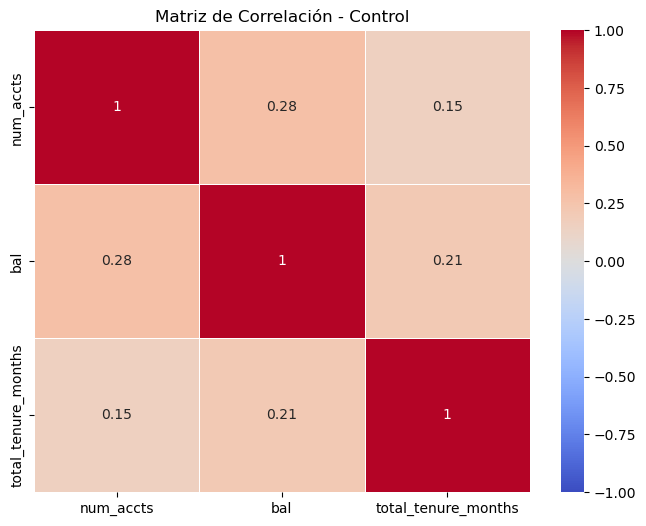

In [32]:
# Gráfico 1: Matriz de correlación para el grupo de control
plt.figure(figsize=(8, 6))
sns.heatmap(control_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Matriz de Correlación - Control")
plt.show()

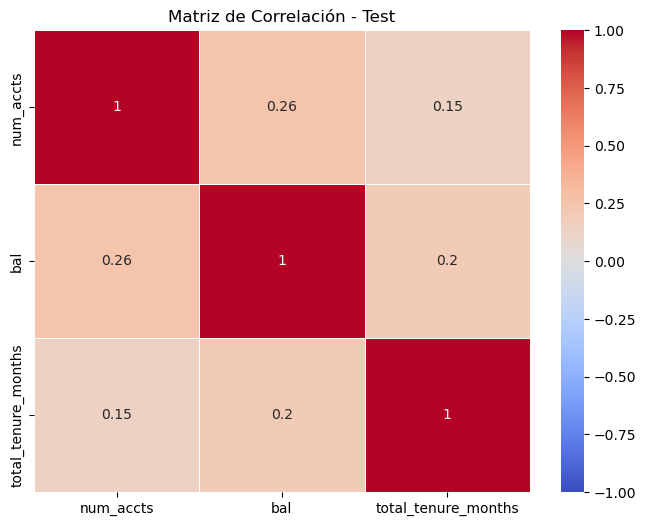

In [31]:
# Gráfico 2: Matriz de correlación para el grupo de test
plt.figure(figsize=(8, 6))
sns.heatmap(test_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Matriz de Correlación - Test")
plt.show()

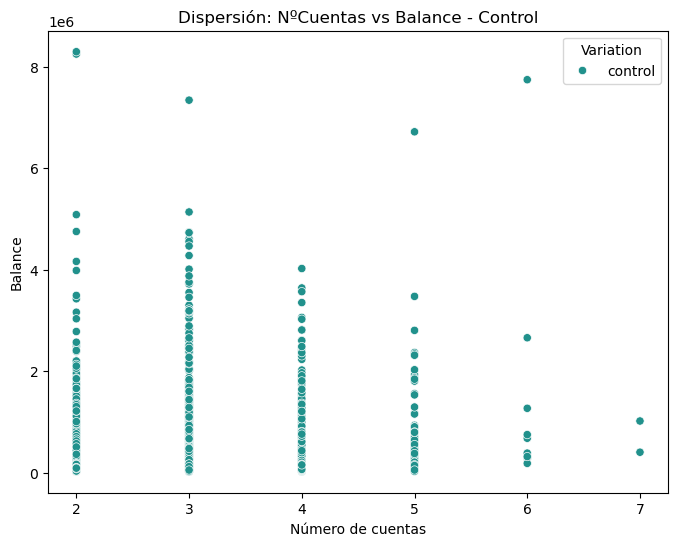

In [ ]:
# Gráfico 3: Diagrama de dispersión de número de cuentas por el balance en el grupo de control
plt.figure(figsize=(8, 6))
sns.scatterplot(data=control_data, x='num_accts', y='bal', hue='Variation', palette='viridis')
plt.title("Dispersión: NºCuentas vs Balance - Control")
plt.xlabel("Número de cuentas")
plt.ylabel("Balance")
plt.show()

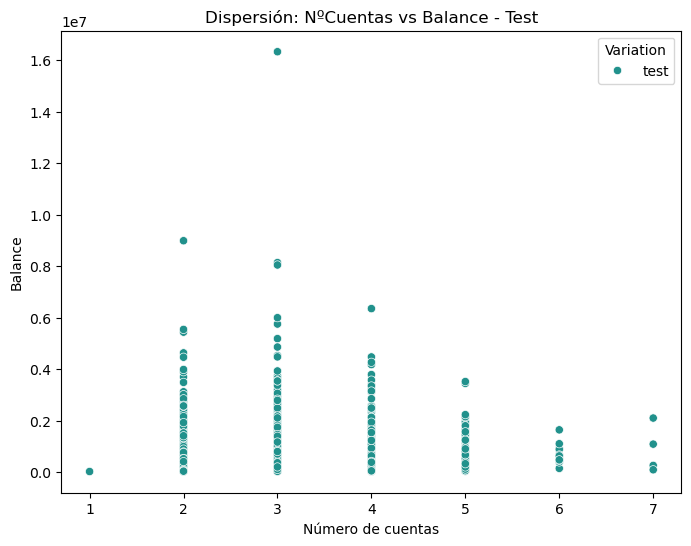

In [ ]:
# Gráfico 4: Diagrama de dispersión de número de cuentas por el balance en el grupo de test
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test_data, x='num_accts', y='bal', hue='Variation', palette='viridis')
plt.title("Dispersión: NºCuentas vs Balance - Test")
plt.xlabel("Número de cuentas")
plt.ylabel("Balance")
plt.show()

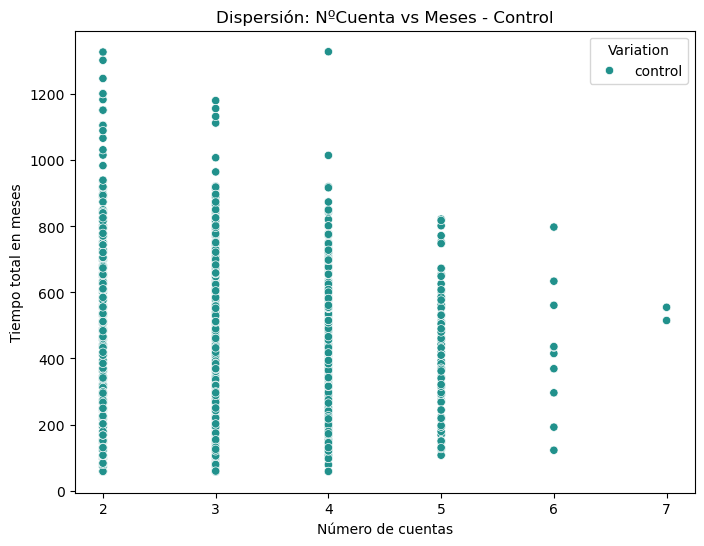

In [ ]:
# Gráfico 5: Diagrama de dispersión de número de cuentas por los meses en el grupo de control
plt.figure(figsize=(8, 6))
sns.scatterplot(data=control_data, x='num_accts', y='total_tenure_months', hue='Variation', palette='viridis')
plt.title("Dispersión: NºCuenta vs Meses - Control")
plt.xlabel("Número de cuentas")
plt.ylabel("Tiempo total en meses")
plt.show()

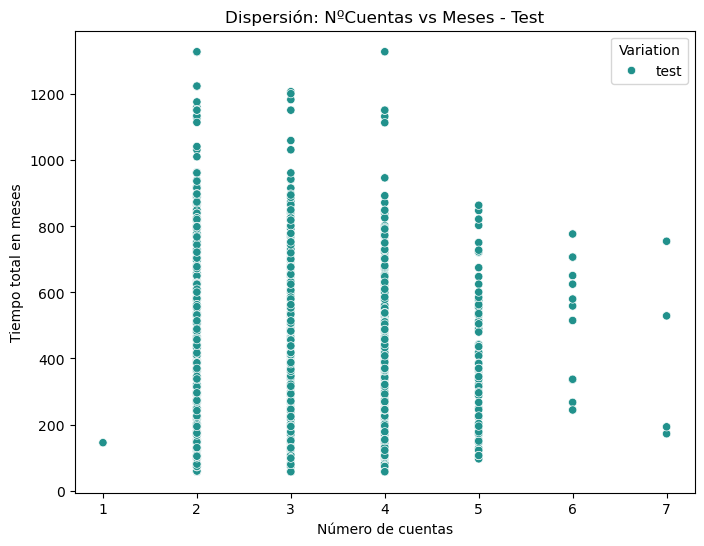

In [30]:
# Gráfico 6: Diagrama de dispersión de número de cuentas por los meses en el grupo de test
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test_data, x='num_accts', y='total_tenure_months', hue='Variation', palette='viridis')
plt.title("Dispersión: NºCuentas vs Meses - Test")
plt.xlabel("Número de cuentas")
plt.ylabel("Tiempo total en meses")
plt.show()

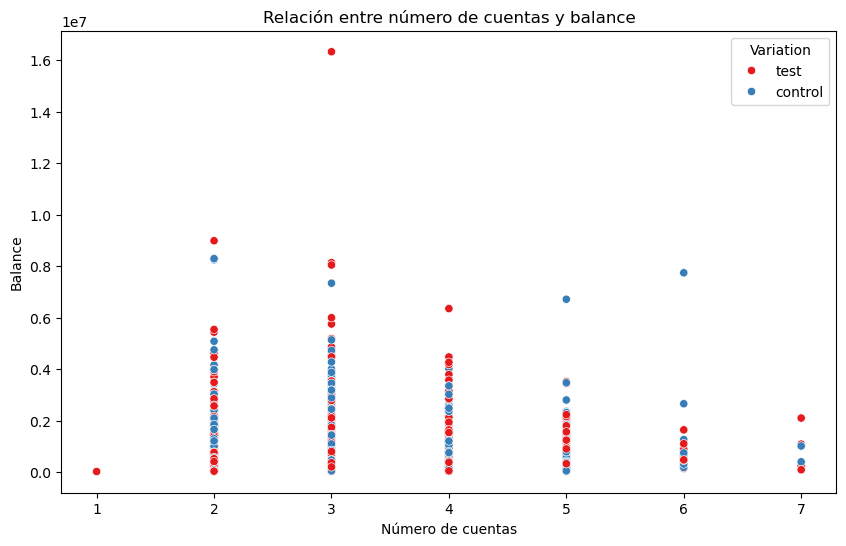

In [33]:
# Diagrama de dispersión num_accts vs bal
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_demo_expanded, x='num_accts', y='bal', hue='Variation', palette='Set1')
plt.title('Relación entre número de cuentas y balance')
plt.xlabel('Número de cuentas')
plt.ylabel('Balance')
plt.show()


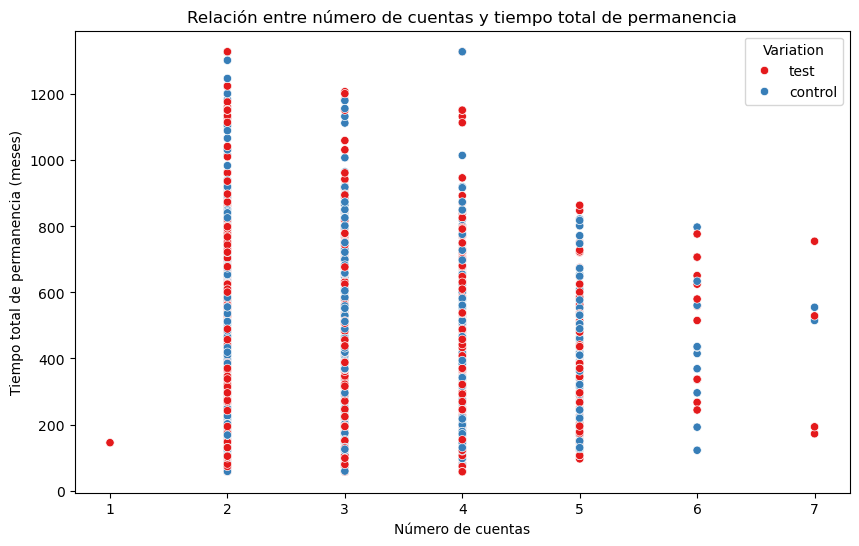

In [34]:
# Diagrama de dispersión num_accts vs total_tenure_months
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_demo_expanded, x='num_accts', y='total_tenure_months', hue='Variation', palette='Set1')
plt.title('Relación entre número de cuentas y tiempo total de permanencia')
plt.xlabel('Número de cuentas')
plt.ylabel('Tiempo total de permanencia (meses)')
plt.show()


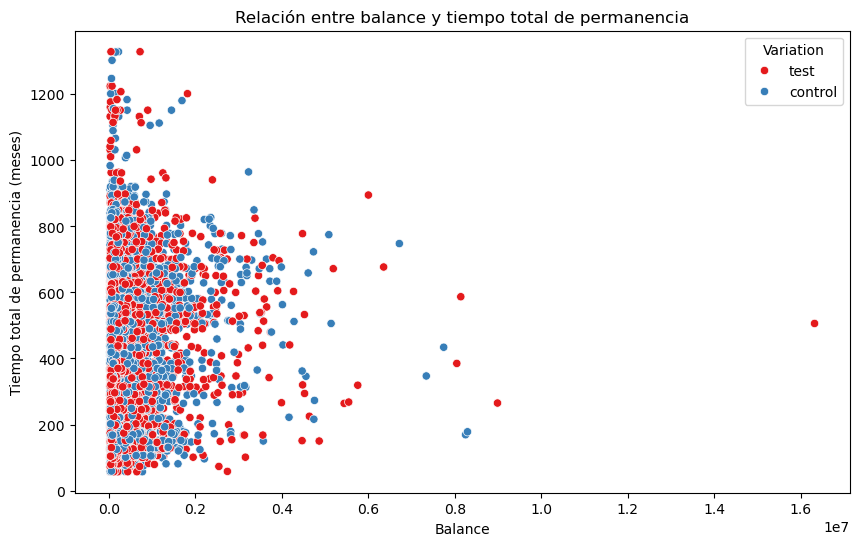

In [35]:
# Diagrama de dispersión bal vs total_tenure_months
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_demo_expanded, x='bal', y='total_tenure_months', hue='Variation', palette='Set1')
plt.title('Relación entre balance y tiempo total de permanencia')
plt.xlabel('Balance')
plt.ylabel('Tiempo total de permanencia (meses)')
plt.show()

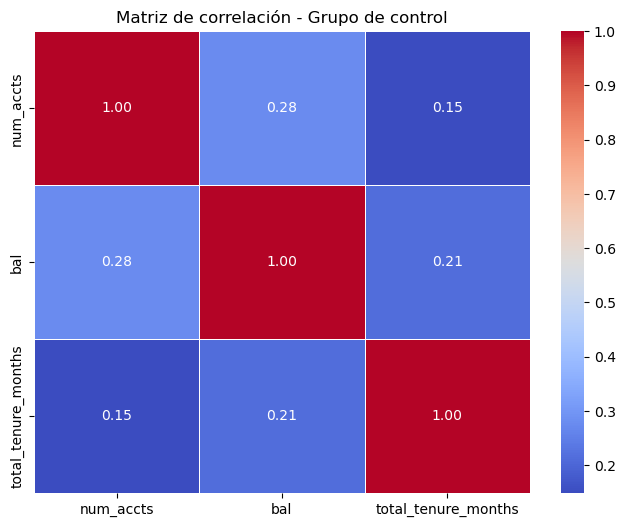

In [36]:
# Correlación para control
plt.figure(figsize=(8, 6))
control_corr = control_data[['num_accts', 'bal', 'total_tenure_months']].corr()
sns.heatmap(control_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación - Grupo de control')
plt.show()

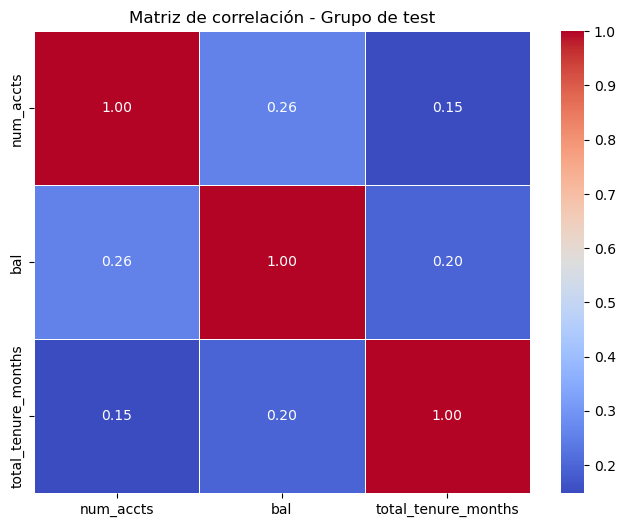

In [37]:
# Correlación para test
plt.figure(figsize=(8, 6))
test_corr = test_data[['num_accts', 'bal', 'total_tenure_months']].corr()
sns.heatmap(test_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación - Grupo de test')
plt.show()

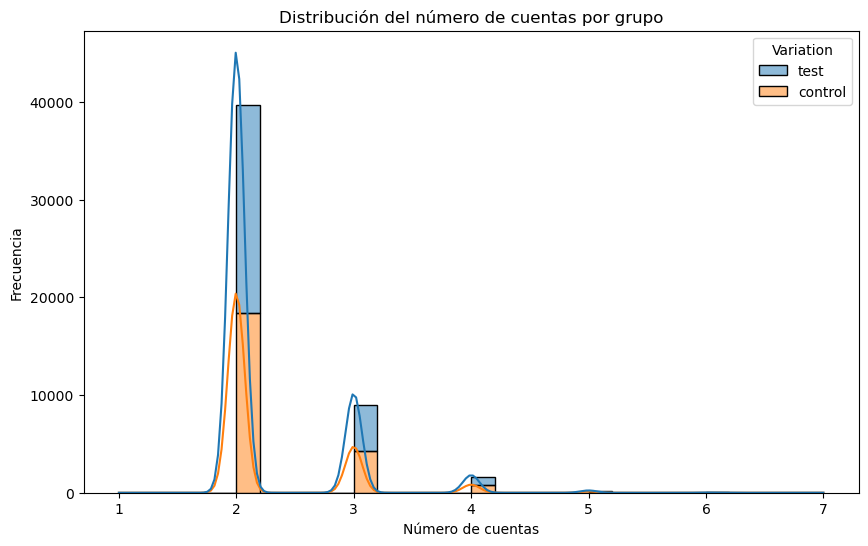

In [38]:
# Histograma de num_accts por grupo
plt.figure(figsize=(10, 6))
sns.histplot(df_demo_expanded, x='num_accts', hue='Variation', multiple='stack', kde=True, bins=30)
plt.title('Distribución del número de cuentas por grupo')
plt.xlabel('Número de cuentas')
plt.ylabel('Frecuencia')
plt.show()

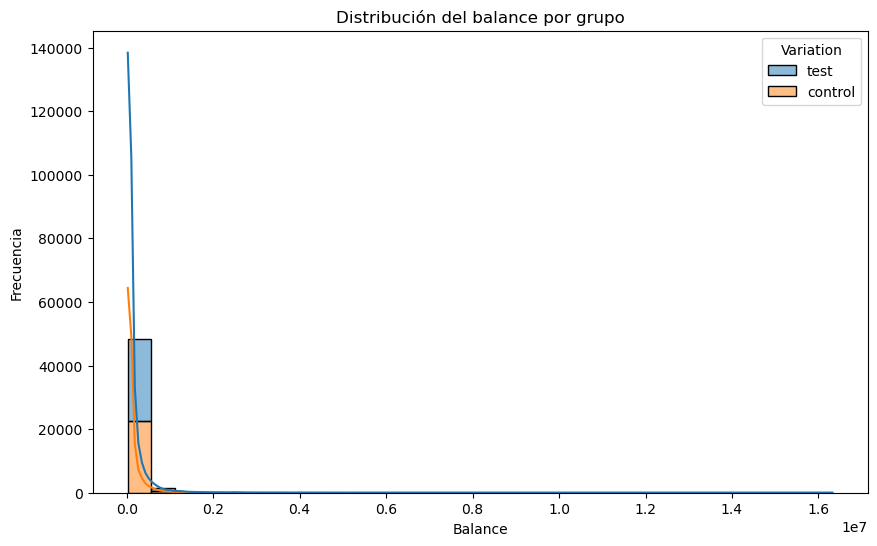

In [39]:
# Histograma de bal por grupo
plt.figure(figsize=(10, 6))
sns.histplot(df_demo_expanded, x='bal', hue='Variation', multiple='stack', kde=True, bins=30)
plt.title('Distribución del balance por grupo')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.show()

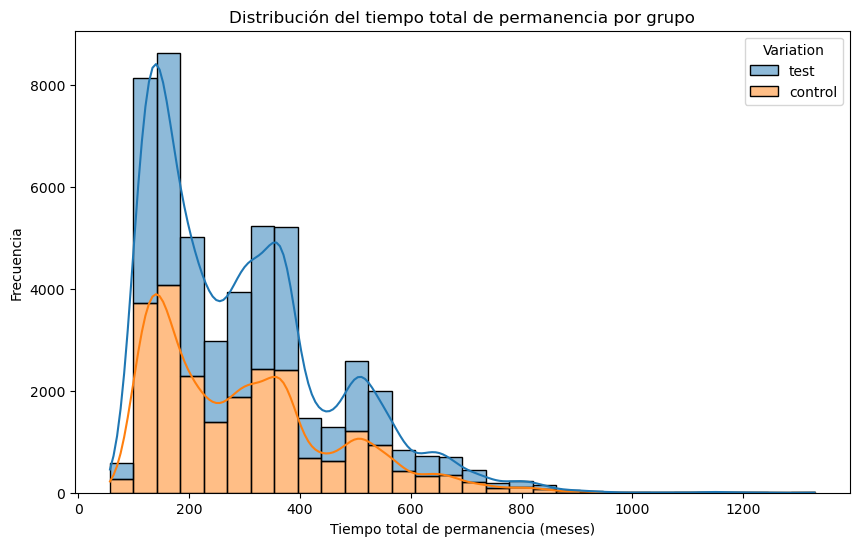

In [40]:
# Histograma de total_tenure_months por grupo
plt.figure(figsize=(10, 6))
sns.histplot(df_demo_expanded, x='total_tenure_months', hue='Variation', multiple='stack', kde=True, bins=30)
plt.title('Distribución del tiempo total de permanencia por grupo')
plt.xlabel('Tiempo total de permanencia (meses)')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\3579823866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_demo_expanded, x='Variation', y='num_accts', palette='Set1')


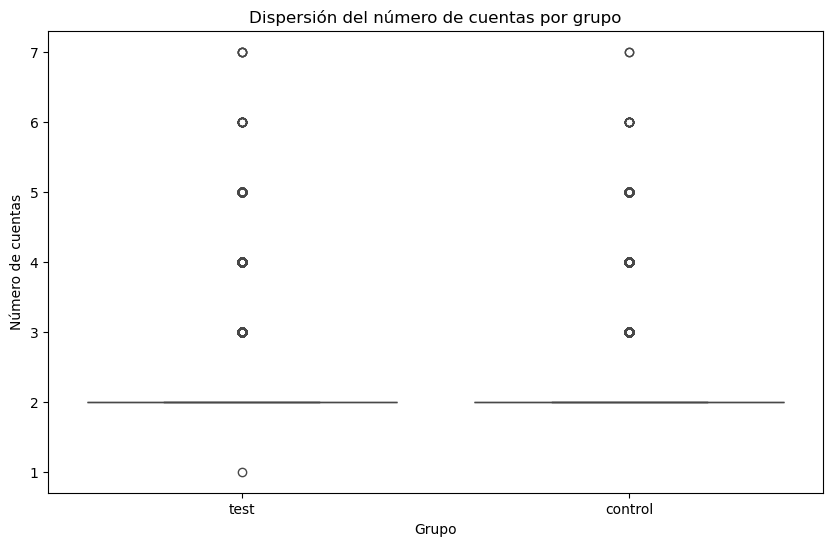

In [41]:
# Boxplot de num_accts por grupo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_demo_expanded, x='Variation', y='num_accts', palette='Set1')
plt.title('Dispersión del número de cuentas por grupo')
plt.xlabel('Grupo')
plt.ylabel('Número de cuentas')
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\3012201157.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_demo_expanded, x='Variation', y='bal', palette='Set1')


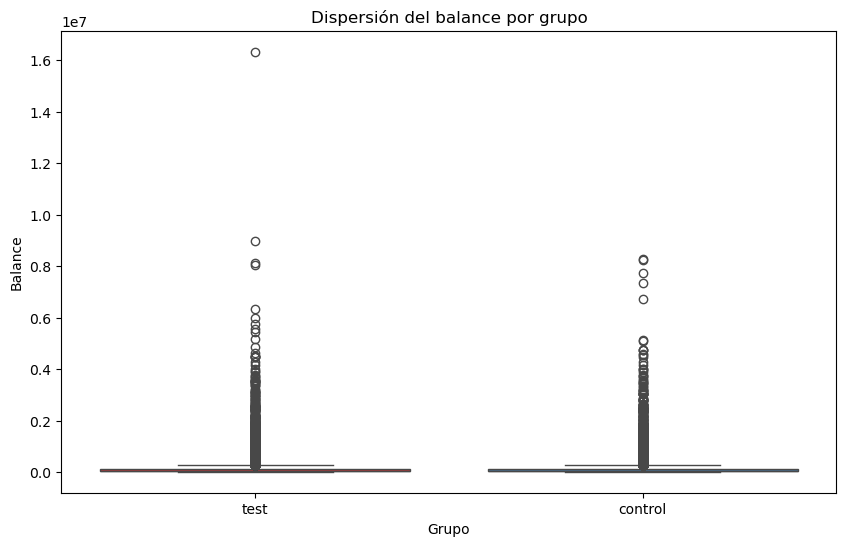

In [42]:
# Boxplot de bal por grupo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_demo_expanded, x='Variation', y='bal', palette='Set1')
plt.title('Dispersión del balance por grupo')
plt.xlabel('Grupo')
plt.ylabel('Balance')
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\3297236817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_demo_expanded, x='Variation', y='total_tenure_months', palette='Set1')


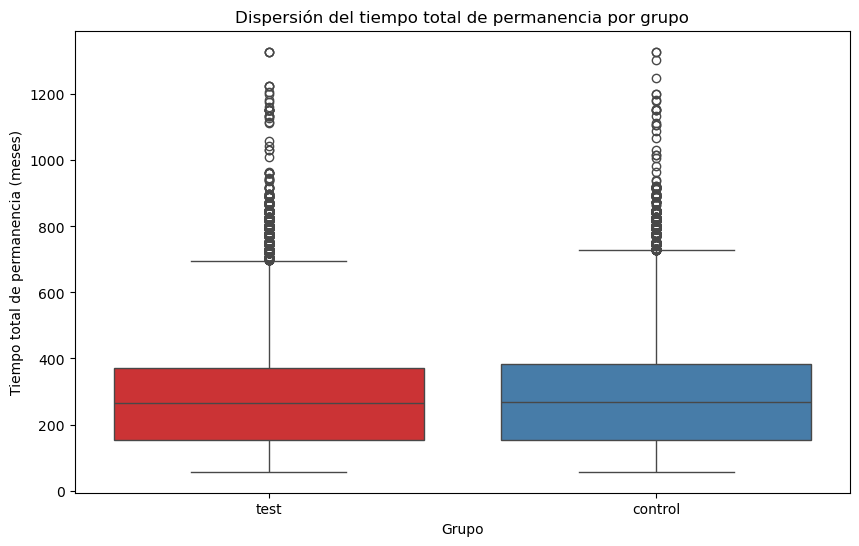

In [43]:
# Boxplot de total_tenure_months por grupo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_demo_expanded, x='Variation', y='total_tenure_months', palette='Set1')
plt.title('Dispersión del tiempo total de permanencia por grupo')
plt.xlabel('Grupo')
plt.ylabel('Tiempo total de permanencia (meses)')
plt.show()

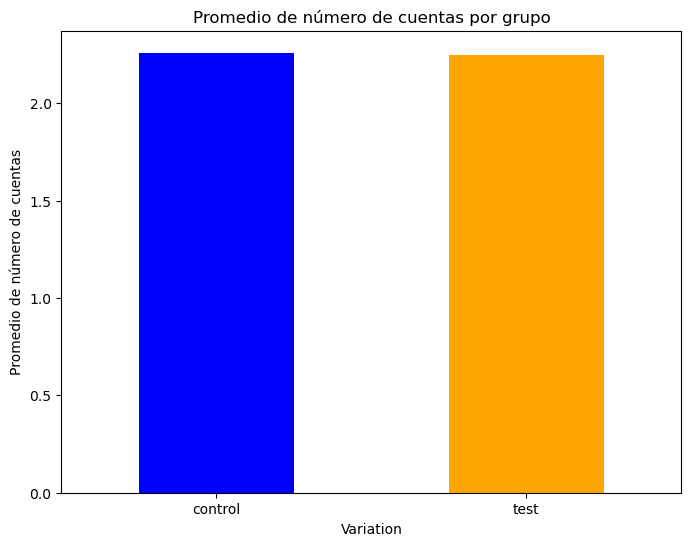

In [44]:
# Promedio de num_accts por grupo
avg_num_accts = df_demo_expanded.groupby('Variation')['num_accts'].mean()
avg_num_accts.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])
plt.title('Promedio de número de cuentas por grupo')
plt.ylabel('Promedio de número de cuentas')
plt.xticks(rotation=0)
plt.show()

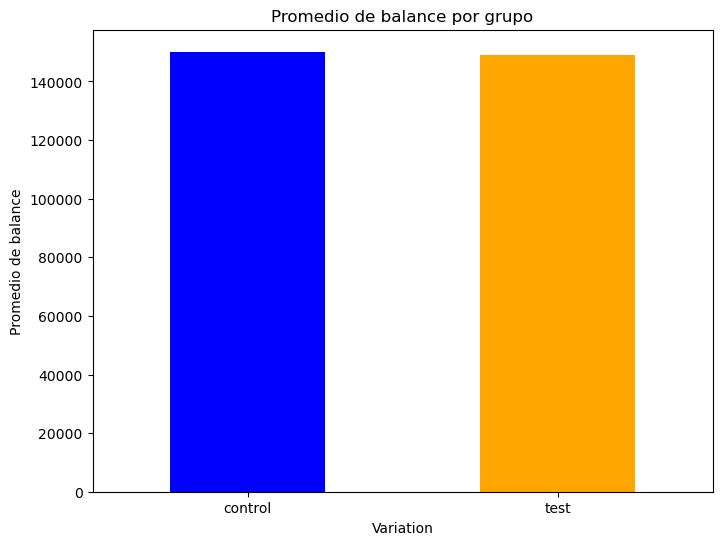

In [45]:
avg_bal = df_demo_expanded.groupby('Variation')['bal'].mean()
avg_bal.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])
plt.title('Promedio de balance por grupo')
plt.ylabel('Promedio de balance')
plt.xticks(rotation=0)
plt.show()

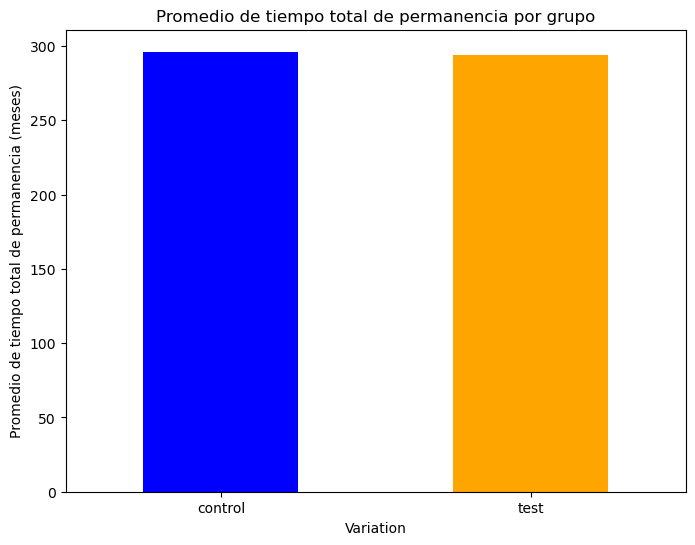

In [46]:
avg_tenure = df_demo_expanded.groupby('Variation')['total_tenure_months'].mean()
avg_tenure.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'])
plt.title('Promedio de tiempo total de permanencia por grupo')
plt.ylabel('Promedio de tiempo total de permanencia (meses)')
plt.xticks(rotation=0)
plt.show()

In [47]:
# Función para detectar outliers usando el IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar outliers en 'num_accts' y 'bal'
outliers_num_accts = detect_outliers(df_demo_expanded, 'num_accts')
outliers_bal = detect_outliers(df_demo_expanded, 'bal')

print(f"Outliers en 'num_accts':")
print(outliers_num_accts)
print(f"Outliers en 'bal':")
print(outliers_bal)

Outliers en 'num_accts':
       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
7         388801            30.0             361.0      57.5     M        5.0   
13       2214073            16.0             193.0      62.5     M        3.0   
21       6590646             8.0             103.0      42.5     F        3.0   
22       7585111             5.0              70.0      42.0     U        3.0   
23       3638336            12.0             152.0      30.5     M        3.0   
...          ...             ...               ...       ...   ...        ...   
70589    5624770             5.0              68.0      21.0     U        3.0   
70592    4277747            12.0             155.0      40.0     M        3.0   
70604    7993686             4.0              56.0      38.5     U        3.0   
70607    1573142            21.0             255.0      68.0     M        3.0   
70608    5602139            21.0             254.0      59.5     F        3.0   

  

In [49]:
from scipy.stats import zscore

In [50]:
# Calcular Z-scores para las variables
df_demo_expanded['zscore_num_accts'] = zscore(df_demo_expanded['num_accts'])
df_demo_expanded['zscore_bal'] = zscore(df_demo_expanded['bal'])

# Filtrar valores atípicos con Z-score mayor que 3 o menor que -3
outliers_zscore_num_accts = df_demo_expanded[df_demo_expanded['zscore_num_accts'].abs() > 3]
outliers_zscore_bal = df_demo_expanded[df_demo_expanded['zscore_bal'].abs() > 3]

print(f"Outliers en 'num_accts' (Z-score):")
print(outliers_zscore_num_accts)
print(f"Outliers en 'bal' (Z-score):")
print(outliers_zscore_bal)

Outliers en 'num_accts' (Z-score):
       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
7         388801            30.0             361.0      57.5     M        5.0   
86       1460648            24.0             288.0      40.5     F        5.0   
133      5115750            22.0             271.0      62.0     F        4.0   
189       976546            19.0             229.0      38.5     M        4.0   
210       425532             5.0              67.0      42.0     U        4.0   
...          ...             ...               ...       ...   ...        ...   
70467    4566250            12.0             144.0      29.0     M        4.0   
70505    9536092             5.0              71.0      26.5     U        4.0   
70508    8367317             7.0              88.0      22.5     M        4.0   
70521    6385793            17.0             210.0      37.0     M        4.0   
70581    2184810            23.0             286.0      75.5     M        

C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\2956298297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo_expanded_clean[['num_accts_z', 'bal_z', 'total_tenure_months_z']] = df_demo_expanded_clean[['num_accts', 'bal', 'total_tenure_months']].apply(zscore)
C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\2956298297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo_expanded_clean[['num_accts_z', 'bal_z', 'total_tenure_months_z']] = df_demo_expanded_clean[['num_accts', 'bal', 'total_ten

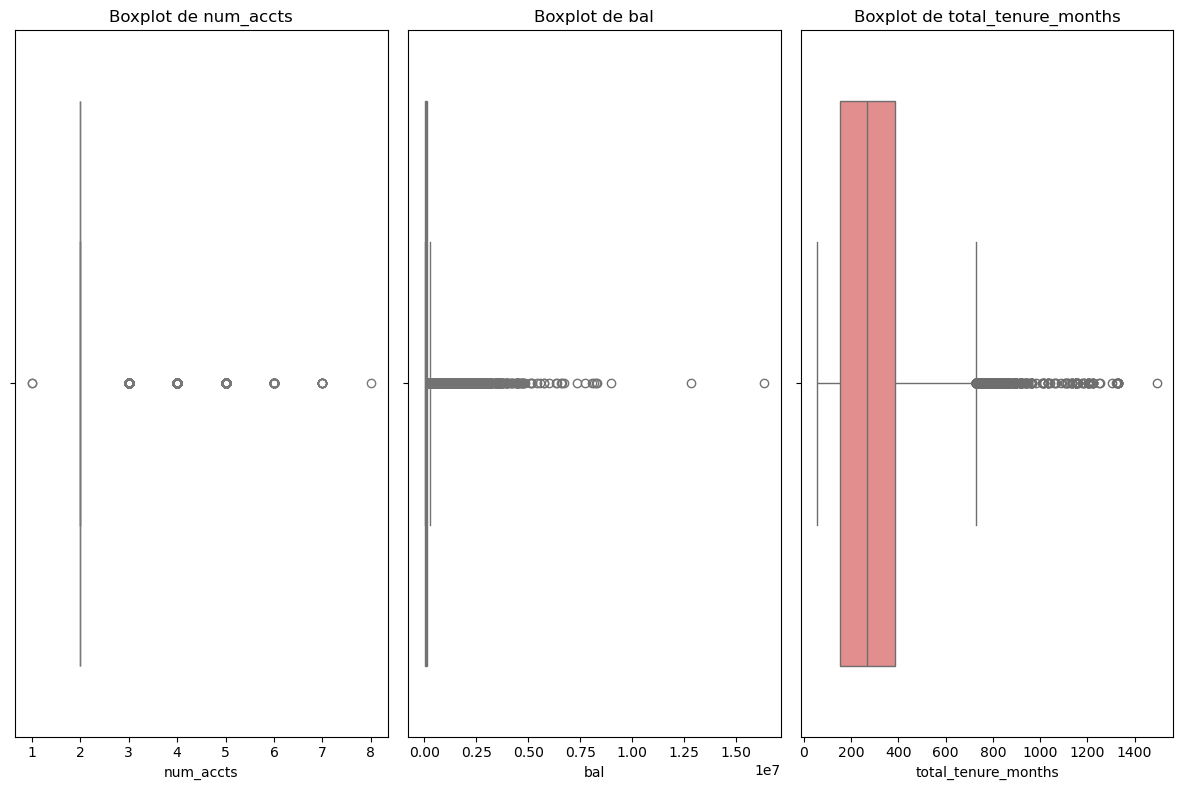

Porcentaje de outliers por columna:
num_accts_z              3.636286
bal_z                    1.538374
total_tenure_months_z    0.961838
dtype: float64


In [60]:
# Calcular el Z-Score para las columnas de interés
df_demo_expanded_clean[['num_accts_z', 'bal_z', 'total_tenure_months_z']] = df_demo_expanded_clean[['num_accts', 'bal', 'total_tenure_months']].apply(zscore)

# Crear una máscara para los valores atípicos (Z-Score > 3 o Z-Score < -3)
outliers = (df_demo_expanded_clean[['num_accts_z', 'bal_z', 'total_tenure_months_z']].abs() > 3)

# Crear un gráfico de dispersión para visualizar los outliers
plt.figure(figsize=(12, 8))

# Gráfico para num_accts
plt.subplot(1, 3, 1)
sns.boxplot(x=df_demo_expanded_clean['num_accts'], color='lightblue')
plt.title('Boxplot de num_accts')

# Gráfico para bal
plt.subplot(1, 3, 2)
sns.boxplot(x=df_demo_expanded_clean['bal'], color='lightgreen')
plt.title('Boxplot de bal')

# Gráfico para total_tenure_months
plt.subplot(1, 3, 3)
sns.boxplot(x=df_demo_expanded_clean['total_tenure_months'], color='lightcoral')
plt.title('Boxplot de total_tenure_months')

plt.tight_layout()
plt.show()

# Visualización de los outliers (porcentaje de valores atípicos por columna)
outlier_percentage = (outliers.sum() / len(df_demo_expanded_clean)) * 100
print("Porcentaje de outliers por columna:")
print(outlier_percentage)

C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\1657335414.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_demo_expanded, x='Variation', y='num_accts', palette='Set1')
C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\1657335414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_demo_expanded, x='Variation', y='bal', palette='Set1')


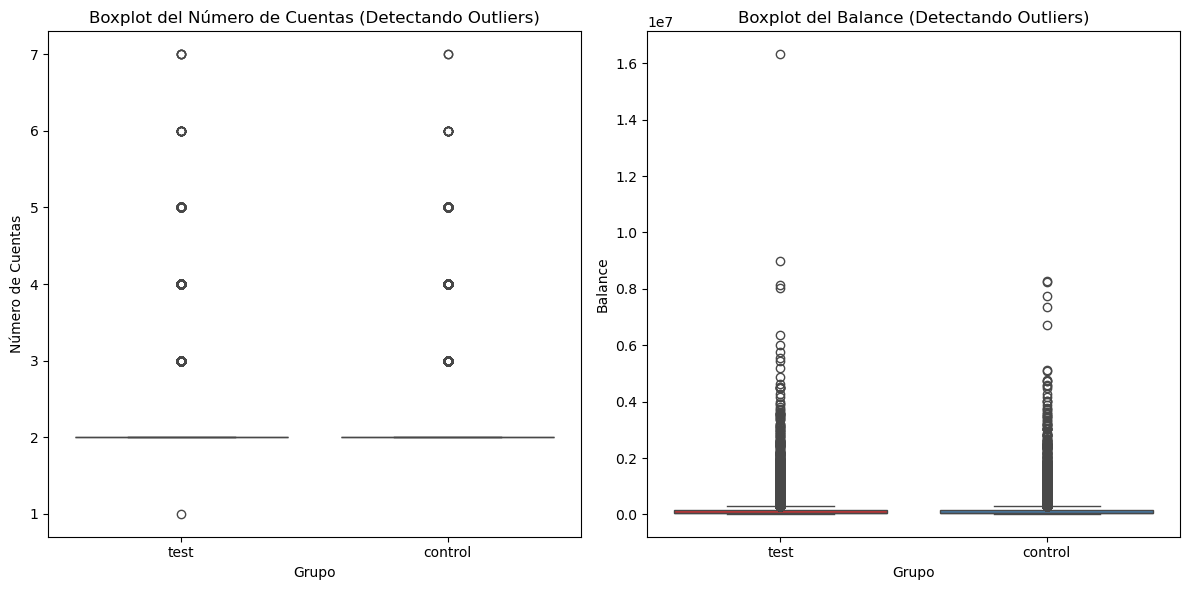

In [54]:
# Gráfico de boxplot para detectar outliers en 'num_accts' y 'bal' por grupo (Test y Control)
plt.figure(figsize=(12, 6))

# Boxplot para 'num_accts'
plt.subplot(1, 2, 1)
sns.boxplot(data=df_demo_expanded, x='Variation', y='num_accts', palette='Set1')
plt.title('Boxplot del Número de Cuentas (Detectando Outliers)')
plt.xlabel('Grupo')
plt.ylabel('Número de Cuentas')

# Boxplot para 'bal'
plt.subplot(1, 2, 2)
sns.boxplot(data=df_demo_expanded, x='Variation', y='bal', palette='Set1')
plt.title('Boxplot del Balance (Detectando Outliers)')
plt.xlabel('Grupo')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()

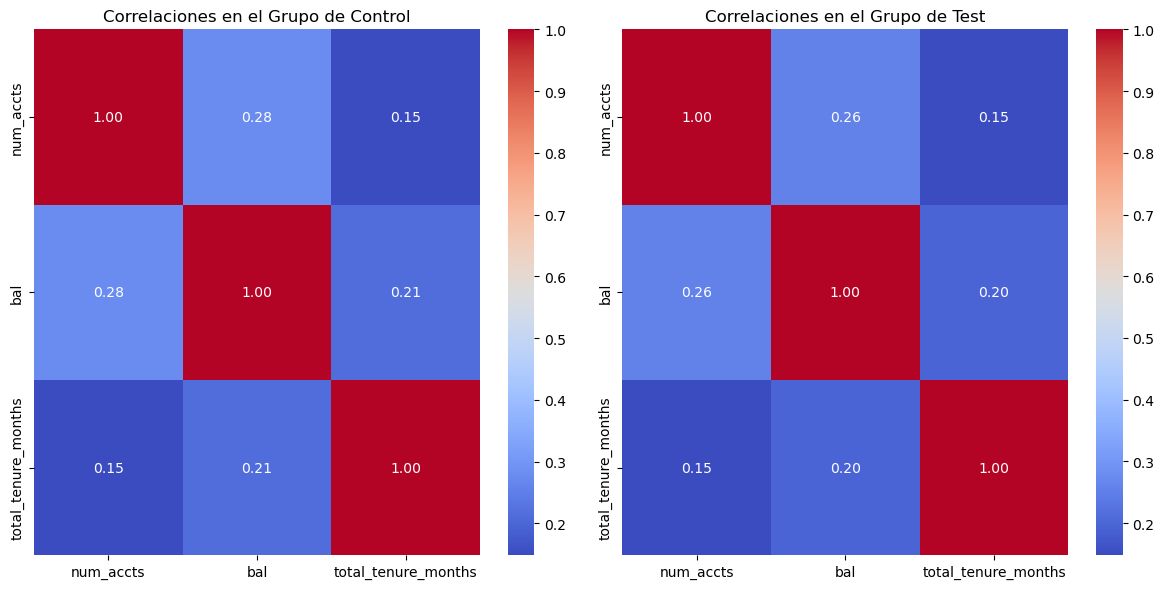

In [55]:
# Correlación en el grupo de control
control_corr = control_data[['num_accts', 'bal', 'total_tenure_months']].corr()

# Correlación en el grupo de test
test_corr = test_data[['num_accts', 'bal', 'total_tenure_months']].corr()

# Gráfico de Heatmap para correlaciones
plt.figure(figsize=(12, 6))

# Correlación del grupo de control
plt.subplot(1, 2, 1)
sns.heatmap(control_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlaciones en el Grupo de Control')

# Correlación del grupo de test
plt.subplot(1, 2, 2)
sns.heatmap(test_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlaciones en el Grupo de Test')

plt.tight_layout()
plt.show()

C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\1961762366.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variation', y='num_accts', data=df_demo_expanded, palette='Set2')
C:\Users\Gema\AppData\Local\Temp\ipykernel_17804\1961762366.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variation', y='bal', data=df_demo_expanded, palette='Set2')


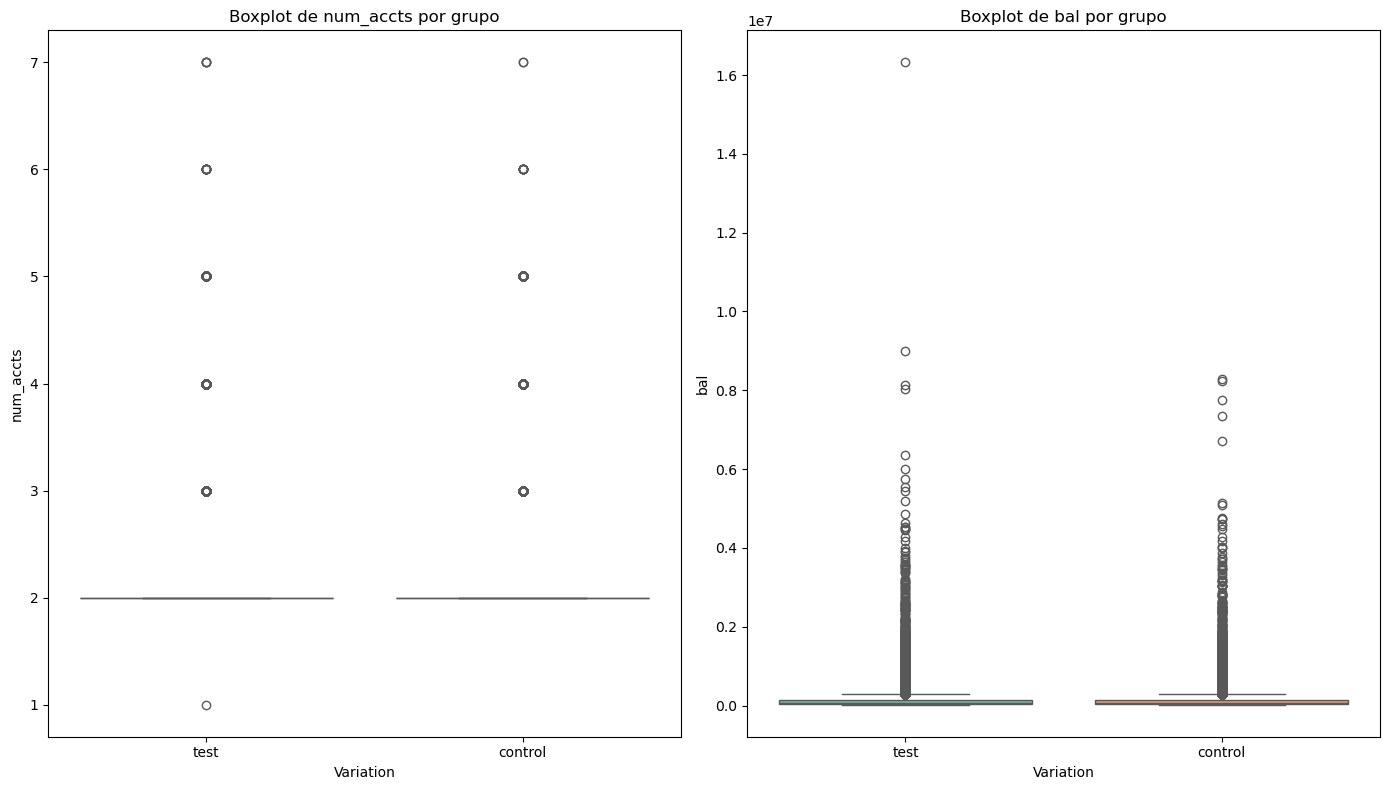

Outliers en 'num_accts' - Grupo de control:
       client_id  num_accts
22       7585111        3.0
46       8475126        3.0
66       8593187        3.0
78       4264493        3.0
88       1459001        3.0
...          ...        ...
50447    3997514        3.0
50467    6724958        3.0
50491    2787512        3.0
50494    4079649        3.0
50496    6967120        3.0

[5116 rows x 2 columns]
Outliers en 'bal' - Grupo de control:
       client_id         bal
8         285619   299388.72
46       8475126   327091.02
49       1329260   666138.27
75       3979917   374919.60
77       5587497   410277.50
...          ...         ...
50373    1133006   427125.41
50386    2774365   510629.91
50412    3521202   479787.80
50438    7431514   366900.22
50496    6967120  4279873.38

[2702 rows x 2 columns]
Outliers en 'num_accts' - Grupo de test:
       client_id  num_accts
7         388801        5.0
13       2214073        3.0
21       6590646        3.0
23       3638336        3.0
41 

In [62]:
# Detectar outliers usando IQR para un DataFrame filtrado por grupo
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Separar por grupo (test y control)
control_data = df_demo_expanded[df_demo_expanded['Variation'] == 'control']
test_data = df_demo_expanded[df_demo_expanded['Variation'] == 'test']

# Detectar outliers en 'num_accts' y 'bal' para control
outliers_num_accts_control = detect_outliers(control_data, 'num_accts')
outliers_bal_control = detect_outliers(control_data, 'bal')

# Detectar outliers en 'num_accts' y 'bal' para test
outliers_num_accts_test = detect_outliers(test_data, 'num_accts')
outliers_bal_test = detect_outliers(test_data, 'bal')

# Visualización de boxplots por grupo (test/control)
plt.figure(figsize=(14, 8))

# Boxplot para 'num_accts' por grupo
plt.subplot(1, 2, 1)
sns.boxplot(x='Variation', y='num_accts', data=df_demo_expanded, palette='Set2')
plt.title('Boxplot de num_accts por grupo')

# Boxplot para 'bal' por grupo
plt.subplot(1, 2, 2)
sns.boxplot(x='Variation', y='bal', data=df_demo_expanded, palette='Set2')
plt.title('Boxplot de bal por grupo')

plt.tight_layout()
plt.show()

# Imprimir los valores atípicos detectados por grupo
print("Outliers en 'num_accts' - Grupo de control:")
print(outliers_num_accts_control[['client_id', 'num_accts']])

print("Outliers en 'bal' - Grupo de control:")
print(outliers_bal_control[['client_id', 'bal']])

print("Outliers en 'num_accts' - Grupo de test:")
print(outliers_num_accts_test[['client_id', 'num_accts']])

print("Outliers en 'bal' - Grupo de test:")
print(outliers_bal_test[['client_id', 'bal']])